In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import joblib
from tqdm import tqdm
import pandas as pd
import librosa.display
import matplotlib.pyplot as plt
from pathlib import Path
import soundfile as sf  # Para guardar en formato WAV


In [37]:
def extraer_caracteristicas_1(ruta_completa,clase):
    y, sr = librosa.load(ruta_completa)

    # Extracción de características
    mean = np.mean(y)
    std = np.std(y)

    #Calcular los Mel-Frequency Cepstral Coefficients (MFCC)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    #Obtener el promedio de los coeficientes MFCC
    mean_mfccs = np.mean(mfccs, axis=1)

    # Calcular las derivadas primera y segunda (delta y delta-delta)
    delta_mfcc = librosa.feature.delta(mfccs)
    delta_delta_mfcc = librosa.feature.delta(mfccs, order=2)

    #Características en el dominio del tiempo
    max_amplitude = np.max(np.abs(y))
    min_amplitude = np.min(np.abs(y))

    #Características en el dominio de la frecuencia
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)[0])
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)[0])
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)[0])

    #Características de energía
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=y)[0])
    rms = np.mean(librosa.feature.rms(y=y)[0])
    clase=clase



    # Crear una fila con todos los datos
    caracteristicas = [
        ruta_completa,
        mean,
        std,
        *mean_mfccs,#Desempaqueta
        max_amplitude,
        min_amplitude,
        spectral_centroid,
        spectral_bandwidth,
        spectral_rolloff,
        zero_crossing_rate,
        rms,
        clase
    ]
    return caracteristicas


In [38]:
# funcion extractor de caracteristicas datos nuevos
def extraer_caracteristicas_nuevos(ruta_completa):
    y, sr = librosa.load(ruta_completa)

    # Extracción de características
    mean = np.mean(y)
    std = np.std(y)

    #Calcular los Mel-Frequency Cepstral Coefficients (MFCC)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    #Obtener el promedio de los coeficientes MFCC
    mean_mfccs = np.mean(mfccs, axis=1)

    #Características en el dominio del tiempo
    max_amplitude = np.max(np.abs(y))
    min_amplitude = np.min(np.abs(y))

    #Características en el dominio de la frecuencia
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)[0])
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)[0])
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)[0])

    #Características de energía
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=y)[0])
    rms = np.mean(librosa.feature.rms(y=y)[0])




    # Crear una fila con todos los datos
    caracteristicas = [mean,
        std,
        *mean_mfccs,#Desempaqueta
        max_amplitude,
        min_amplitude,
        spectral_centroid,
        spectral_bandwidth,
        spectral_rolloff,
        zero_crossing_rate,
        rms,

    ]
    return caracteristicas

In [39]:
data = []

In [40]:
# Lista para almacenar las filas del dataset hombre y mujeres enfermos
#data = []
directorio_audio="/content/drive/MyDrive/PROYECTO_FINAL/Frases_enfermos_HM/export"
clase="sick"
# Cargar el archivo CSV con los nombres de los archivos y las clases
#metadata = pd.read_csv(ruta_metadata)

# Iterar sobre los archivos de audio en el directorio
for archivo_audio in tqdm(os.listdir(directorio_audio)):
        if archivo_audio.endswith('.wav'):  # Asegurarse de que estás trabajando con archivos de audio
            ruta_completa = os.path.join(directorio_audio, archivo_audio)
            # Extraer características 1
            fila = extraer_caracteristicas_1(ruta_completa,clase)

            # Agregar la fila a la lista de datos
            data.append(fila)

       # nombres_columnas = [
       # 'Ruta',
       # 'Media señal',
       # 'Desviación estándar de la señal',
       # 'MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10', 'MFCC_11', 'MFCC_12', 'MFCC_13',
       # 'Amplitud máxima',
       # 'Amplitud mínima',
       # 'Promedio del centroides espectrales',
       # 'Promedio del ancho de banda espectral',
       # 'Promedio del rolloff espectral',
       # 'Promedio de la tasa de cruce por cero',
       # 'RMS (Root Mean Square)',
       # 'Clase'
   ## ]

#df = pd.DataFrame(data, columns=nombres_columnas)

    # Guardar el DataFrame como un archivo CSV
#df.to_csv('dataset_test_1.csv', index=False)


100%|██████████| 862/862 [00:58<00:00, 14.70it/s]


In [41]:
# Lista para almacenar las filas del dataset hombre y mujeres sanas
#data = []
directorio_audio="/content/drive/MyDrive/PROYECTO_FINAL/frases sanos + whitenoise sanos"
clase="sano"
# Cargar el archivo CSV con los nombres de los archivos y las clases
#metadata = pd.read_csv(ruta_metadata)

# Iterar sobre los archivos de audio en el directorio
for archivo_audio in tqdm(os.listdir(directorio_audio)):
        if archivo_audio.endswith('.wav'):  # Asegurarse de que estás trabajando con archivos de audio
            ruta_completa = os.path.join(directorio_audio, archivo_audio)
            # Extraer características 1
            fila = extraer_caracteristicas_1(ruta_completa,clase)

            # Agregar la fila a la lista de datos
            data.append(fila)

100%|██████████| 828/828 [01:05<00:00, 12.63it/s]


In [42]:
# funcion para nuevos datos

def nuevos_datos(directorio_audio):

    datos_nuevos = []
    clase="desconocido"


# Iterar sobre los archivos de audio en el directorio
    for archivo_audio in tqdm(os.listdir(directorio_audio)):
            if archivo_audio.endswith('.wav'):  # Asegurarse de que estás trabajando con archivos de audio
                ruta_completa = os.path.join(directorio_audio, archivo_audio)
                # Extraer características 1
                fila = extraer_caracteristicas_nuevos(ruta_completa)

                # Agregar la fila a la lista de datos
                datos_nuevos.append(fila)
                df_nuevos = pd.DataFrame(datos_nuevos)

    return df_nuevos




In [43]:
nombres_columnas = [
        'Ruta',
        'Media señal',
        'Dstandar',#Desviación estándar de la señal
        'MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10', 'MFCC_11', 'MFCC_12', 'MFCC_13',
        'Amáxima',#Amplitud maxima
        'Amín',#Amplitud mínima
        'AvgCS', # Promedio del centroides espectrales
        'AvgBws',#Promedio del ancho de banda espectral
        'Avgrolloff',#Promedio del rolloff espectral
        'AvgCrossZ',#Promedio de la tasa de cruce por cero
        'RMS ',#RMS (Root Mean Square)
        'Clase'
    ]

df = pd.DataFrame(data, columns=nombres_columnas)

    # Guardar el DataFrame como un archivo CSV
#df.to_csv('dataset_test_1.csv', index=False)


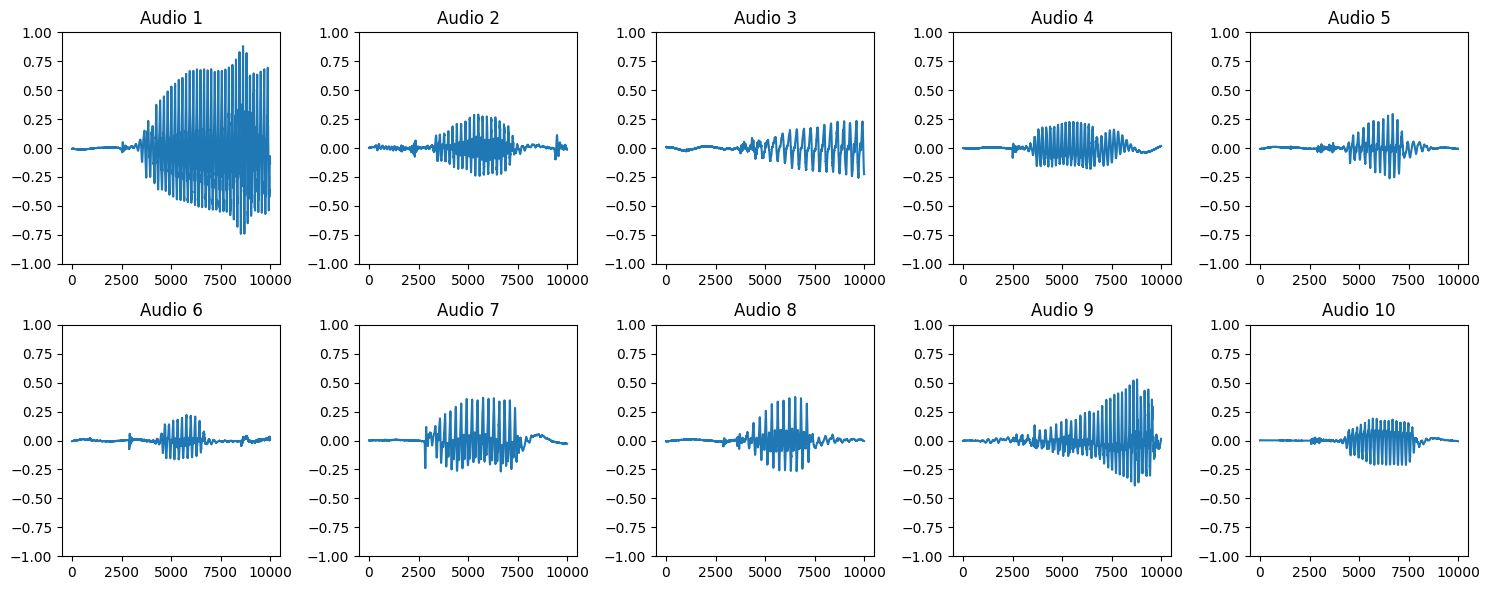

In [44]:
#grafica audios personas enfermas

# Ruta de la carpeta con los archivos WAV
folder_path = '/content/drive/MyDrive/PROYECTO_FINAL/Frases_enfermos_HM/export'

# Lista para almacenar los audios
enfermos_signals = []

# Iterar sobre los archivos WAV en la carpeta
for p in Path(folder_path).glob('*.wav'):
    audio, sr = librosa.load(p, sr=None)
    enfermos_signals.append(audio)
    # Guardar el audio en formato WAV
    sf.write(f'audio_{len(enfermos_signals)}.wav', audio, sr)

    # Mostrar solo los primeros 10
    if len(enfermos_signals) == 10:
        break

# Mostrar los primeros 10 audios
plt.figure(figsize=(15, 6))
for i, x in enumerate(enfermos_signals):
    plt.subplot(2, 5, i+1)
    plt.plot(x[:10000])
    plt.ylim(-1, 1)
    plt.title(f'Audio {i+1}')
    plt.tight_layout()

plt.show()

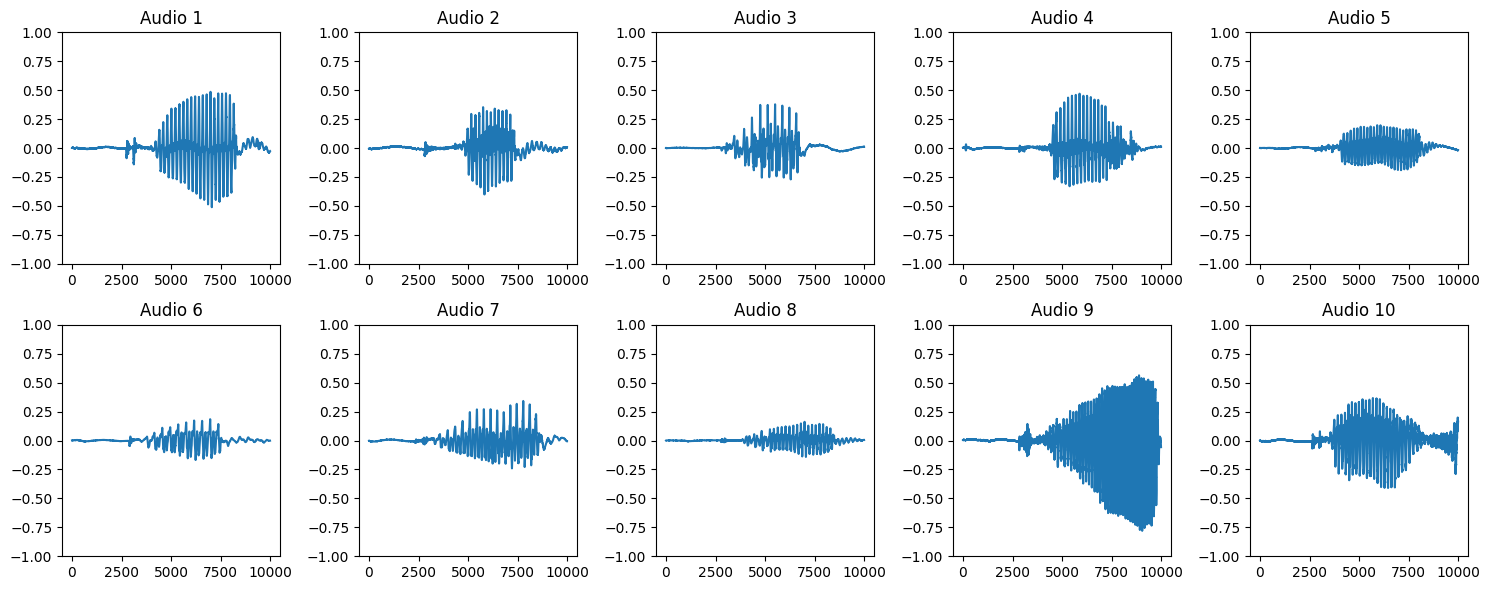

In [45]:
#audios personas sanas

# Ruta de la carpeta con los archivos WAV
folder_sanos = '/content/drive/MyDrive/PROYECTO_FINAL/frases sanos + whitenoise sanos'

# Lista para almacenar los audios
sanos_signals = []

# Iterar sobre los archivos WAV en la carpeta
for p in Path(folder_sanos).glob('*.wav'):
    audio, sr = librosa.load(p, sr=None)
    sanos_signals.append(audio)
    # Guardar el audio en formato WAV
    sf.write(f'audio_{len(sanos_signals)}.wav', audio, sr)

    # Mostrar solo los primeros 10
    if len(sanos_signals) == 10:
        break

# Mostrar los primeros 10 audios
plt.figure(figsize=(15, 6))
for i, x in enumerate(sanos_signals):
    plt.subplot(2, 5, i+1)
    plt.plot(x[:10000])
    plt.ylim(-1, 1)
    plt.title(f'Audio {i+1}')
    plt.tight_layout()

plt.show()

In [46]:
print(df)

                                                   Ruta  Media señal  \
0     /content/drive/MyDrive/PROYECTO_FINAL/Frases_e...     0.000614   
1     /content/drive/MyDrive/PROYECTO_FINAL/Frases_e...     0.000453   
2     /content/drive/MyDrive/PROYECTO_FINAL/Frases_e...     0.000132   
3     /content/drive/MyDrive/PROYECTO_FINAL/Frases_e...     0.000507   
4     /content/drive/MyDrive/PROYECTO_FINAL/Frases_e...     0.000123   
...                                                 ...          ...   
1685  /content/drive/MyDrive/PROYECTO_FINAL/frases s...     0.000072   
1686  /content/drive/MyDrive/PROYECTO_FINAL/frases s...    -0.000116   
1687  /content/drive/MyDrive/PROYECTO_FINAL/frases s...    -0.000420   
1688  /content/drive/MyDrive/PROYECTO_FINAL/frases s...     0.000224   
1689  /content/drive/MyDrive/PROYECTO_FINAL/frases s...     0.000676   

      Dstandar      MFCC_1      MFCC_2     MFCC_3     MFCC_4     MFCC_5  \
0     0.178174 -276.717987   95.966431  16.797182  32.426895

In [47]:
#directorio_audio="/content/drive/MyDrive/PROYECTO_FINAL/PATH/Hombre_frases_path"
###clase="sick"
#recorrer_archivos_audio(directorio_audio,clase)


In [48]:
print(df.describe())

       Media señal     Dstandar       MFCC_1       MFCC_2       MFCC_3  \
count  1690.000000  1690.000000  1690.000000  1690.000000  1690.000000   
mean     -0.004044     0.118630  -282.151123   106.475945    23.665068   
std       0.020767     0.040693    38.666977    17.610891    10.867072   
min      -0.157601     0.035656  -491.181824    47.859734   -12.093027   
25%      -0.000071     0.089358  -307.888565    94.626657    16.539884   
50%       0.000095     0.112139  -282.112305   105.651089    24.071674   
75%       0.000313     0.140257  -257.048340   118.117174    31.214457   
max       0.005689     0.379412  -155.457825   163.457306    58.902077   

            MFCC_4       MFCC_5       MFCC_6       MFCC_7       MFCC_8  ...  \
count  1690.000000  1690.000000  1690.000000  1690.000000  1690.000000  ...   
mean     29.706881    11.881541    -3.928052    -3.134042     3.951713  ...   
std       8.534193     8.416375     8.828109     6.621864     6.620919  ...   
min       1.08686

<ipython-input-49-865cca46b406>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr(method="pearson")


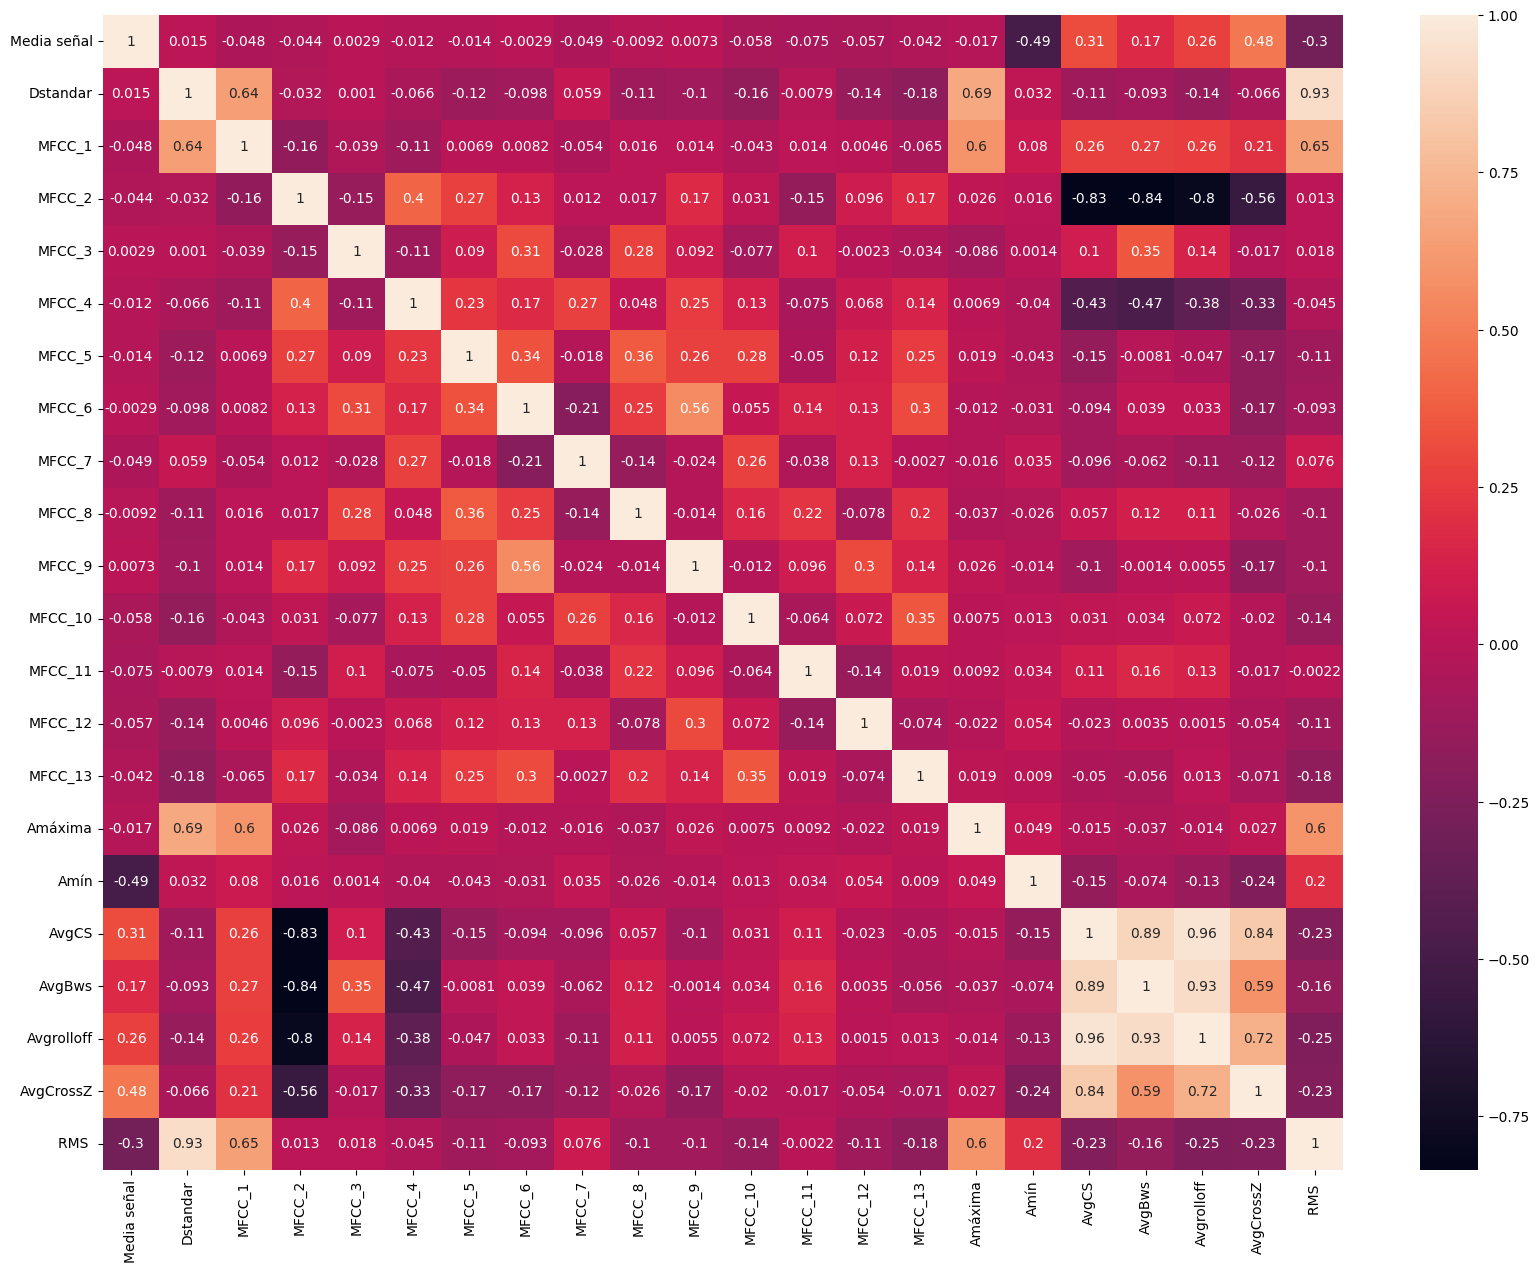

In [49]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



corr_df = df.corr(method="pearson")

plt.figure(figsize=(20, 15))
sns.heatmap(corr_df, annot=True)
plt.show()

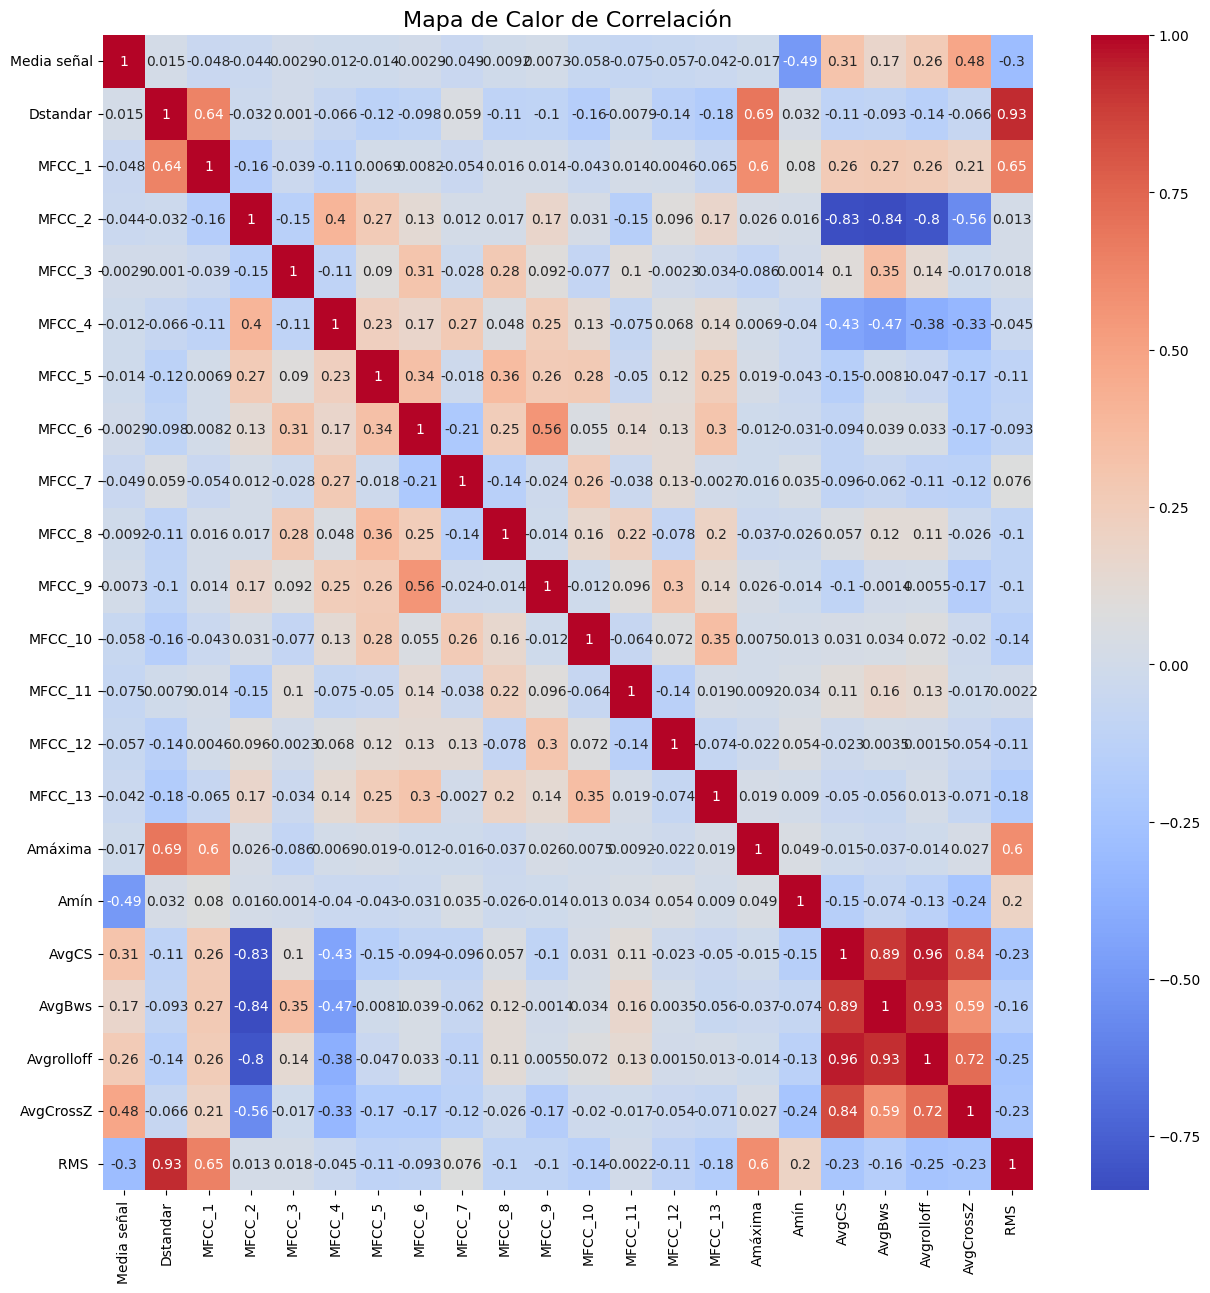

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes el DataFrame df y corr_df

# Crear una figura y ejes más grandes
fig, ax = plt.subplots(figsize=(15, 15))

# Crear el mapa de calor
sns.heatmap(corr_df, cmap='coolwarm', annot=True, ax=ax)

# Establecer el título
plt.title('Mapa de Calor de Correlación', fontsize=16)

# Mostrar el mapa de calor
plt.show()

In [51]:
df['Clase'] = df['Clase'].map({'sick': 1, 'sano': 0})

In [52]:
#Balancear datos


In [53]:
df = df.drop('Ruta', axis=1)

X = np.array(df.drop(['Clase'],1))
y = np.array(df['Clase'])
X.shape
df

<ipython-input-53-4b67d6dff44b>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Clase'],1))


,Media señal,Dstandar,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,...,MFCC_12,MFCC_13,Amáxima,Amín,AvgCS,AvgBws,Avgrolloff,AvgCrossZ,RMS,Clase
0,0.000614,0.178174,-276.717987,95.966431,16.797182,32.426895,5.460468,-14.558228,0.648947,6.209880,...,-4.830564,-11.588970,0.873630,1.083681e-06,1625.625807,1973.739746,2994.980315,0.062381,0.141706,1
1,0.000453,0.066054,-331.671173,88.990852,26.850248,29.664236,18.703295,-9.027935,0.670050,6.027178,...,-4.951526,-13.915579,0.400773,2.278248e-07,1907.157887,2495.266379,4065.203272,0.062527,0.053275,1
2,0.000132,0.106650,-298.162170,94.625618,47.661263,33.394974,14.282223,9.721114,3.715047,17.661226,...,-6.271485,-0.735719,0.697904,0.000000e+00,1702.239366,2401.045299,3580.825966,0.046420,0.086092,1
3,0.000507,0.113010,-335.460968,90.559555,30.698204,34.027248,10.324809,-1.605529,6.281756,10.063773,...,-5.504457,-7.531395,0.483933,1.432927e-06,1584.164885,1936.438780,2741.204364,0.062995,0.094569,1
4,0.000123,0.107914,-328.966431,125.024414,32.765697,21.456146,0.954221,-5.444850,-0.443363,2.875868,...,-11.196189,-4.804162,0.510106,1.364759e-06,1400.222067,1815.462351,2614.938354,0.056946,0.093533,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685,0.000072,0.134721,-257.857269,89.259430,31.624552,25.424679,11.169475,-6.342003,1.277335,4.490835,...,-4.070621,-4.872029,0.487450,0.000000e+00,1981.613879,2422.649781,3987.726461,0.073655,0.117288,0
1686,-0.000116,0.094120,-264.026093,87.153717,8.108302,22.360500,6.376717,-6.792879,-5.353277,-5.790411,...,-1.978047,-10.762166,0.590285,1.875451e-06,2147.776554,2417.749291,4267.611694,0.084934,0.078290,0
1687,-0.000420,0.174934,-249.250519,86.481918,39.283684,29.063925,12.588850,-5.027445,1.726527,2.317801,...,-2.036935,-8.833076,0.738299,0.000000e+00,1968.246363,2463.030727,3936.837769,0.073656,0.141352,0
1688,0.000224,0.111299,-246.599503,119.082268,22.345362,34.988991,16.415154,0.150623,-6.721178,-3.947393,...,-4.959118,-4.093157,0.723121,8.525676e-07,1720.296502,2127.586645,3363.335218,0.085621,0.090118,0


In [54]:
# Cardinalidad de las variables categóricas
cardinalidad_categoricas = df['Clase'].nunique()
print(f"Cardinalidad de la variable categórica 'Clase': {cardinalidad_categoricas}")

Cardinalidad de la variable categórica 'Clase': 2


In [55]:
#df = df.drop('Ruta', axis=1)

#X = np.array(df.drop(['Clase'],1))
#y = np.array(df['Clase'])
#X.shape

In [56]:
# Verificar si hay algún valor nulo en el DataFrame
hay_nulos = df.isnull().any().any()

# Imprimir el resultado
if hay_nulos:
    print("El DataFrame tiene valores nulos.")
else:
    print("El DataFrame no tiene valores nulos.")

El DataFrame no tiene valores nulos.


In [57]:
# Verificar desequilibrio en las clases
desequilibrio_clases = df['Clase'].value_counts()
print("Distribución de clases:")
print(desequilibrio_clases)
# 1= enfermo
# 2= sano

Distribución de clases:
1    862
0    828
Name: Clase, dtype: int64


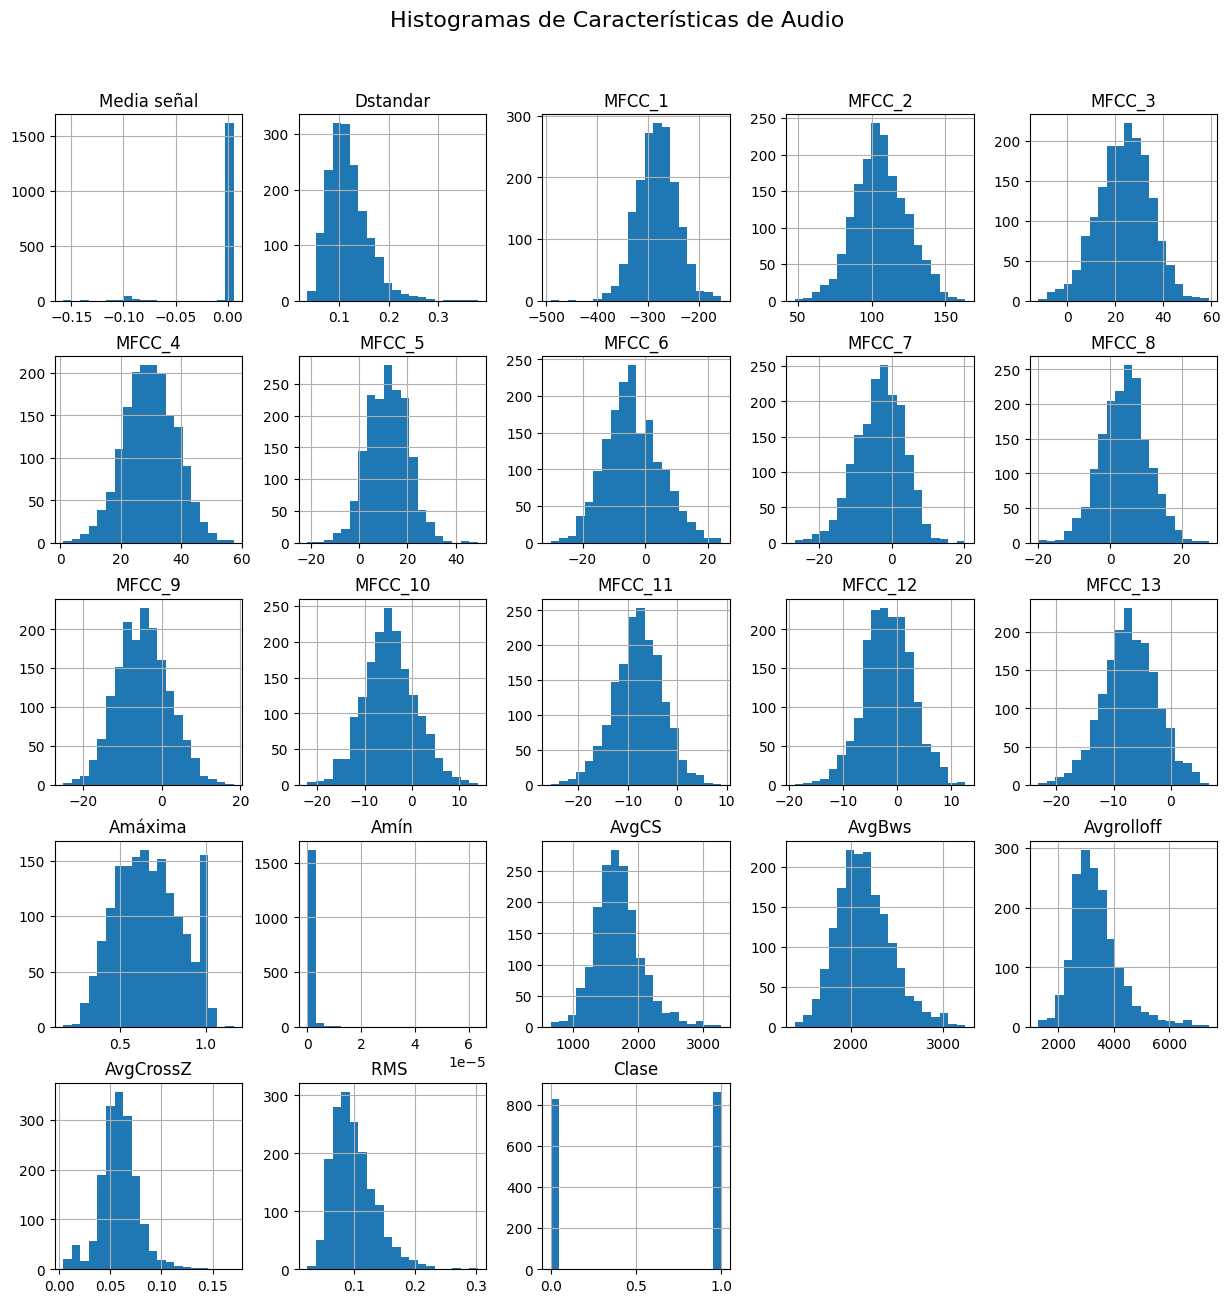

In [58]:
# Visualizar histogramas
df.hist(bins=20, figsize=(15, 15))
plt.suptitle('Histogramas de Características de Audio', y=0.95, fontsize=16)
plt.show()

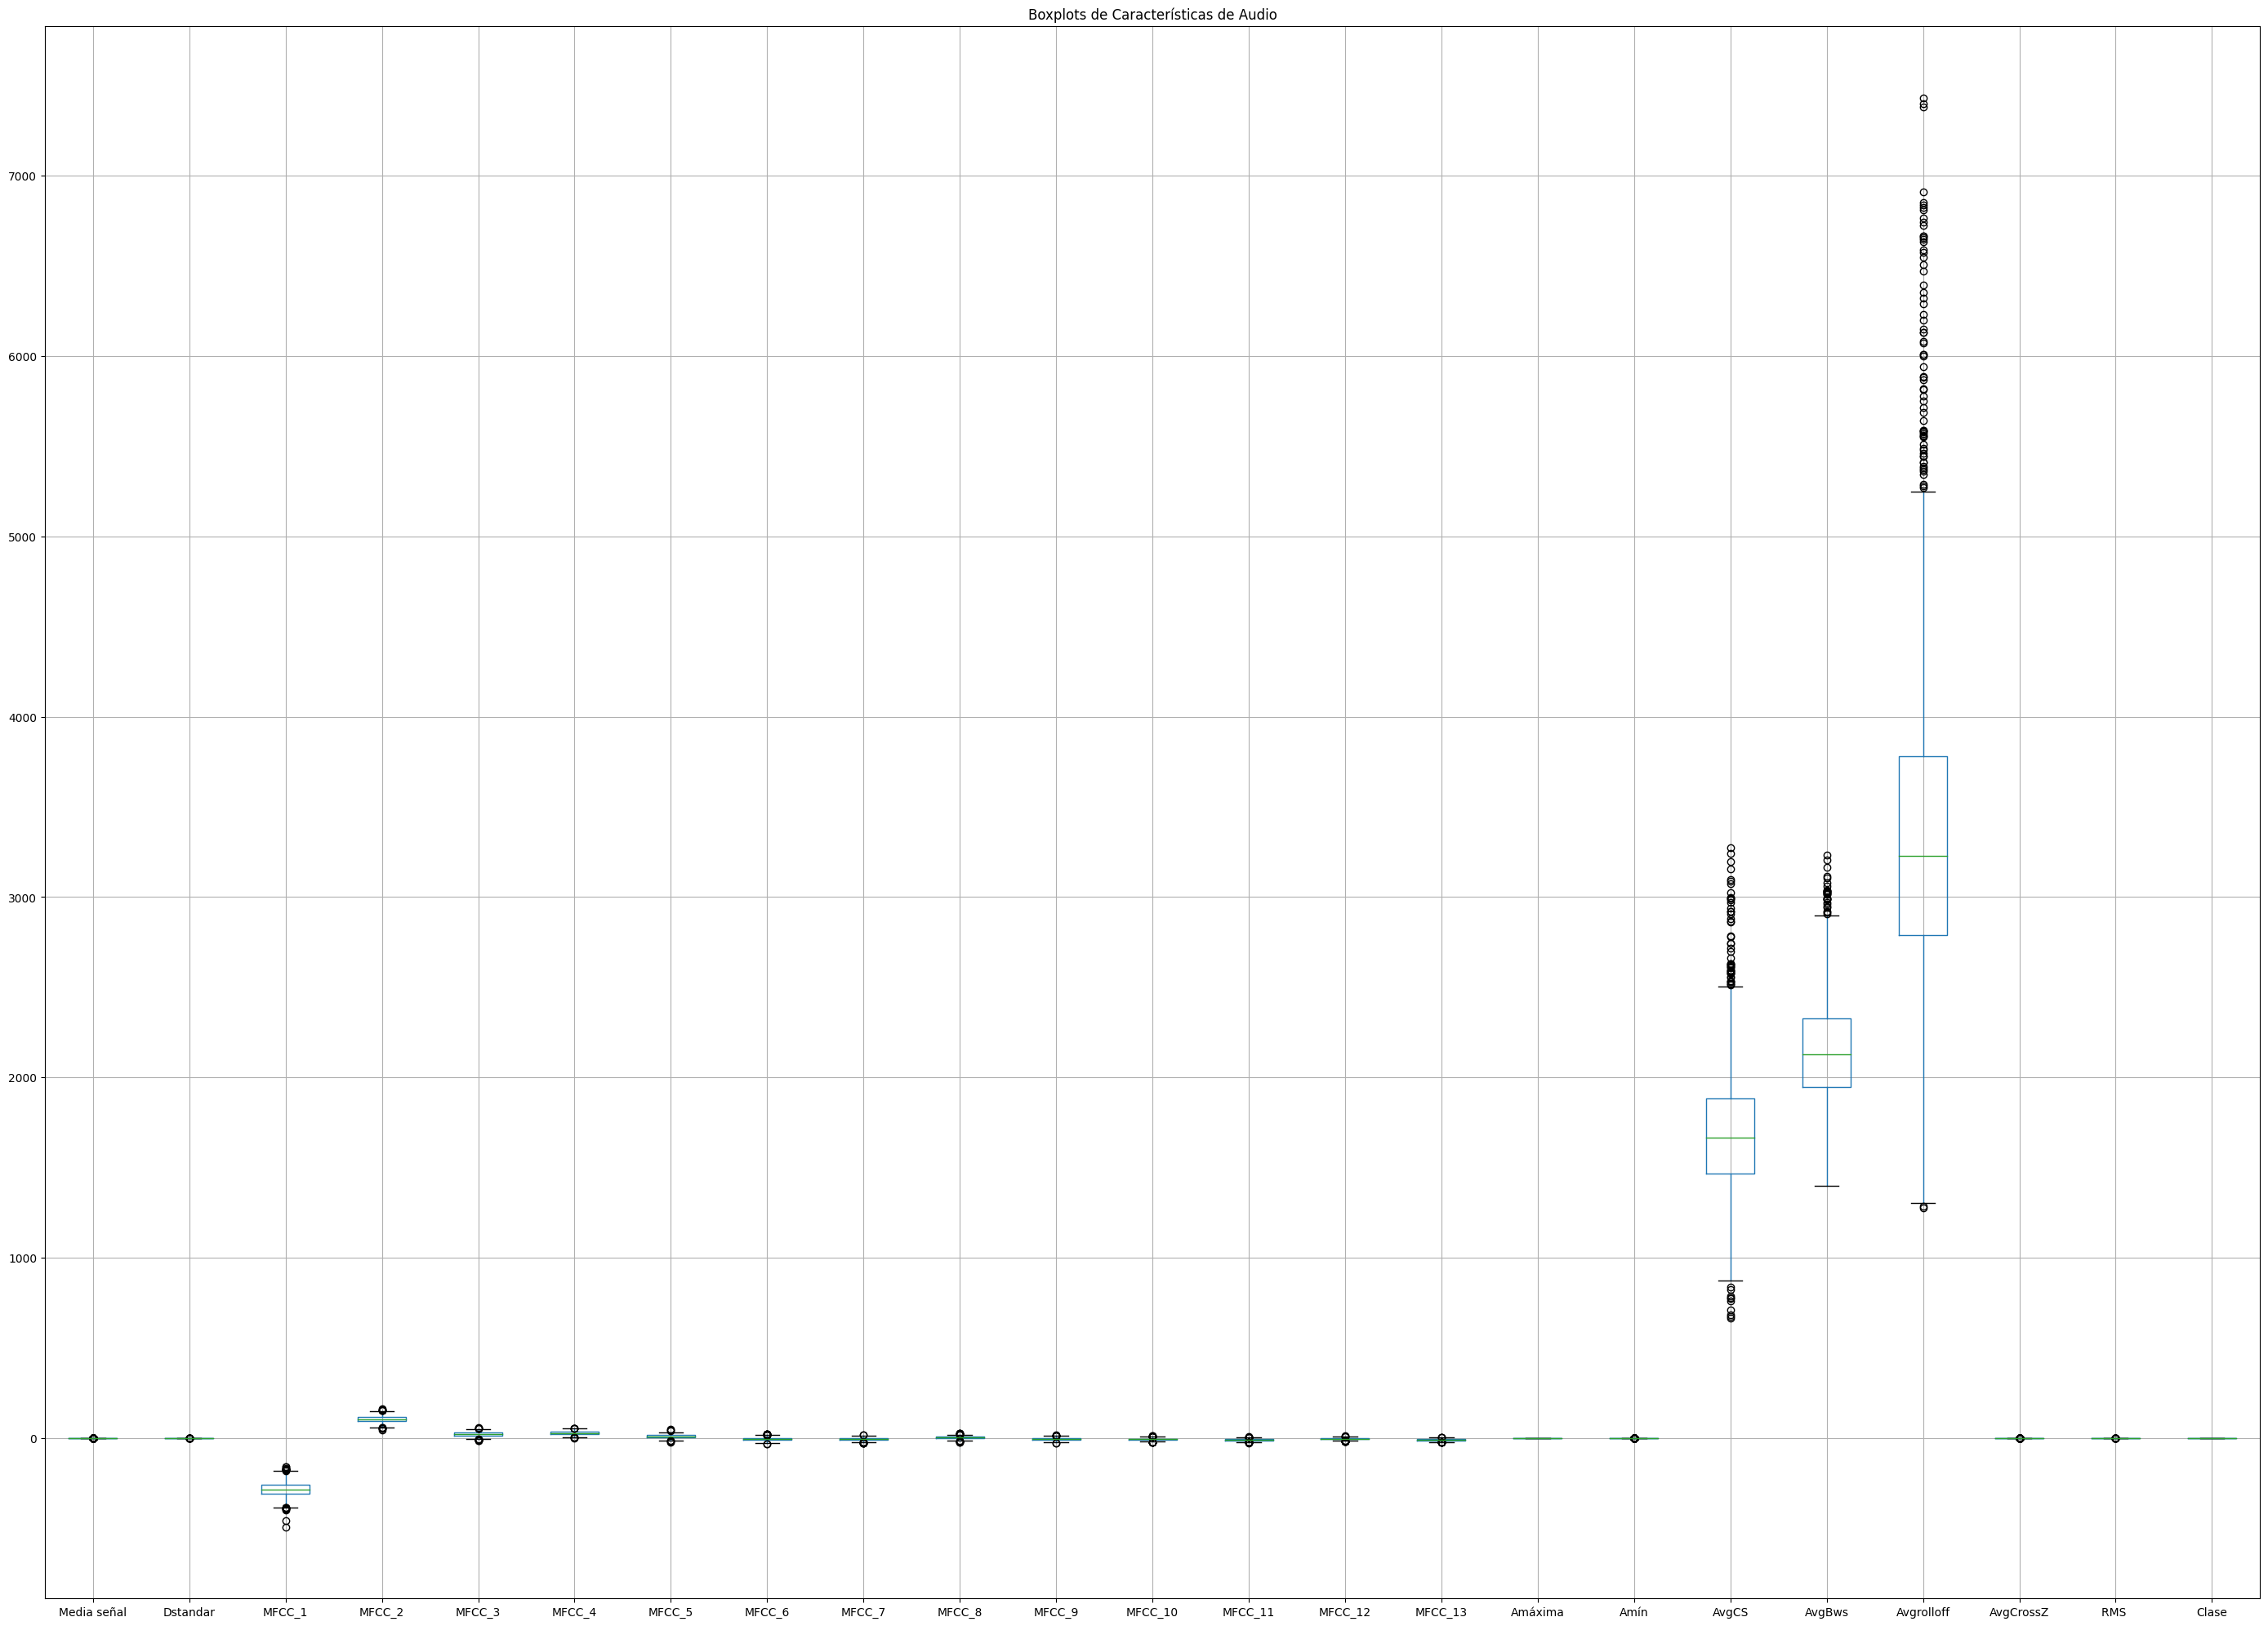

In [59]:
# Visualizar boxplots para identificar valores atípicos
df.boxplot(figsize=(35, 25))
plt.title('Boxplots de Características de Audio')
plt.show()

In [60]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sb

model = linear_model.LogisticRegression()
model.fit(X,y)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
predictions = model.predict(X)
print(predictions)

[0 1 1 ... 1 1 0]


In [62]:
model.score(X,y)

0.6313609467455621

In [63]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [64]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=8, random_state=seed,shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression: 0.632396 (0.031091)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [65]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.6183431952662722


In [ ]:
#directorio_audio="/content/drive/MyDrive/PROYECTO_FINAL/personas_enfermas_hombre_mujeres_test"
##X_new = nuevos_datos(directorio_audio)
model.predict(X_new)